In [1]:
%cd
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import os
#!python -V or python --version -V # checks python version.

/home/rdhill13


In [41]:
def plots(infile):
    #os.listdir() returns only the filename, not the full path. Need full path to open file
    filepath = os.path.join(seqdir,infile)
    file = uproot.open(filepath)
    tree = file['events;1']
    ecal = tree['EcalBarrelClusters']
    hcal = tree['HcalBarrelClusters']
    ecalEn = ak.flatten(ecal.arrays()['EcalBarrelClusters.energy']/1000,axis=None)  
    hcalEn = ak.flatten(hcal.arrays()['HcalBarrelClusters.energy']/1000,axis=None)
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.hist(ecalEn,bins=60,histtype='step',edgecolor='red',label="ECAL Energy",log=True); 
    plt.title(infile)
    plt.xlabel("$E_{EM}$ (GeV)")
    plt.legend()
    plt.subplot(122)
    plt.hist(hcalEn,bins=60,histtype='step',edgecolor='black',label="HCAL Energy",log=True); 
    plt.title(infile)
    plt.xlabel("$E_{HAD}$ (GeV)")
    plt.legend()
    plt.show()
    

def plots2(infile):
    filepath = os.path.join(seqdir,infile)
    file = uproot.open(filepath)
    tree = file['events;1']
    ecal = tree['EcalBarrelClusters']
    hcal = tree['HcalBarrelClusters']
    ecalEn = ak.flatten(ecal.arrays()['EcalBarrelClusters.energy']/1000,axis=None)  
    hcalEn = ak.flatten(hcal.arrays()['HcalBarrelClusters.energy']/1000,axis=None)
    
    plt.hist(ecalEn,bins=60,histtype='step',edgecolor='red',label="ECAL Energy",log=True); 
    plt.hist(hcalEn,bins=60,histtype='step',edgecolor='black',label="HCAL Energy",log=True); 
    plt.title(infile)
    plt.xlabel("Energy (GeV)")
    plt.legend()
    plt.savefig(infile+".png")
    plt.show()
    

def plots3(infile, title):
    file = uproot.open(infile)
    tree = file['events;1']
    ecal = tree['EcalBarrelClusters']
    hcal = tree['HcalBarrelClusters']
    ecalEn = ak.flatten(ecal.arrays()['EcalBarrelClusters.energy']/1000,axis=None)  
    hcalEn = ak.flatten(hcal.arrays()['HcalBarrelClusters.energy']/1000,axis=None)
    
    plt.hist(ecalEn,bins=60,histtype='step',edgecolor='red',label="ECAL Energy",log=True); 
    plt.hist(hcalEn,bins=60,histtype='step',edgecolor='black',label="HCAL Energy",log=True); 
    plt.title(title)  # basename extracts just the filename
    plt.xlabel("Energy (GeV)")
    plt.legend()
    plt.savefig("Pictures/"+(os.path.basename(infile))+".png")
    plt.show()

In [42]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName) #all the files and sub directories in the given path.
    #allFiles = list()
    endFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        allFiles = list()
        fullPath = os.path.join(dirName, entry)
        print(fullPath)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            if len(os.listdir(fullPath)) == 0:  # if empty directory, continue to next loop to avoid index error.
                continue
            else:
                allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
  
        if len(allFiles) != 0:
            endFiles.append(sorted(allFiles)[-1])
        else:
            continue
    return endFiles


def fileLists(path):
    lastFiles = []
    allFiles = []
    for root, dirs, files in os.walk(path): 
    #     root : Prints out directories only from what you specified.
    #     dirs : Prints out sub-directories from root.
    #     files : Prints out all files from root and directories.
    
    #     This function first looks in the root directory, then checks subdirectories and then the files. Iterates through each subdirectory till we get to the files. When at files,
    #     append to allFiles list, and dirFiles to get the last file of each directory. Then, we append the last files to another list to just get the last file of each subdirectory. 
        dirFiles = []
        for file in files:
            dirFiles.append(file)
            allFiles.append(file)
            #append the file name to the list
        if len(dirFiles) != 0:
            lastFiles.append(os.path.join(root,sorted(dirFiles)[-1]))
        else:
            continue
    return lastFiles

In [43]:
dirKaon = "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/reco/SINGLE/kaon0L"
dirNeutron = "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/reco/SINGLE/neutron"
dirElectron = "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/reco/SINGLE/e-"
dirGamma = "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/reco/SINGLE/gamma"
dirPip = "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/reco/SINGLE/pi+"
dirPi0 = "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/reco/SINGLE/pi0"
path = "/home/rdhill13/projects/rrg-wdconinc/wdconinc/EIC/campaigns/reco/SINGLE"

kaonFiles = fileLists(dirKaon)
neutronFiles = fileLists(dirNeutron)
electronFiles = fileLists(dirElectron)
gammaFiles = fileLists(dirGamma)
pipFiles = fileLists(dirPip)
pi0Files = fileLists(dirPi0)
lastFiles = fileLists(path)

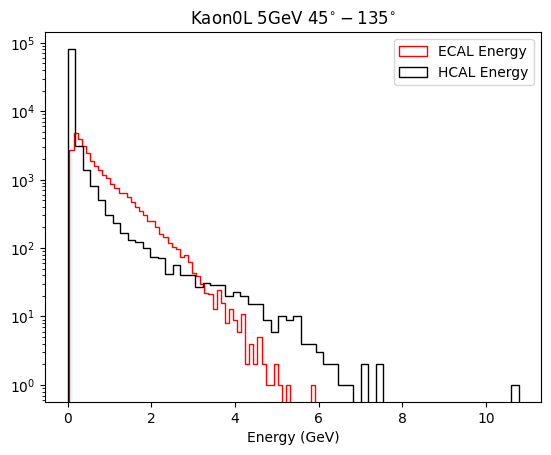

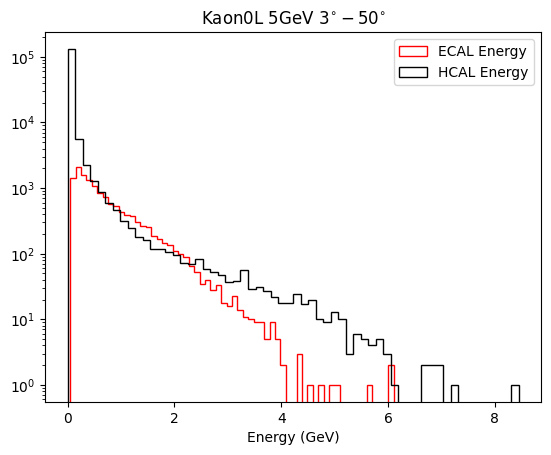

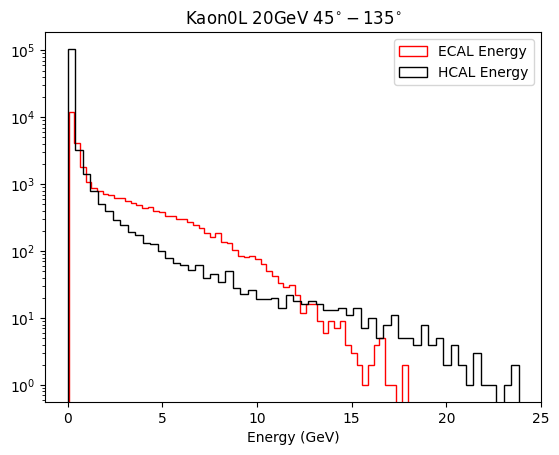

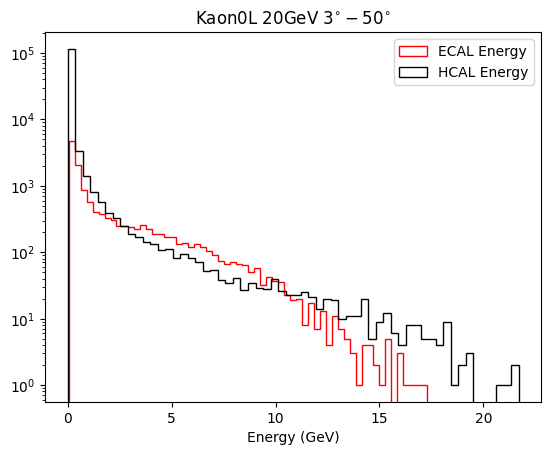

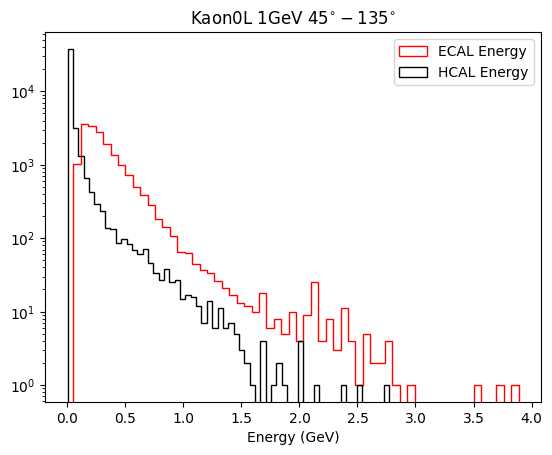

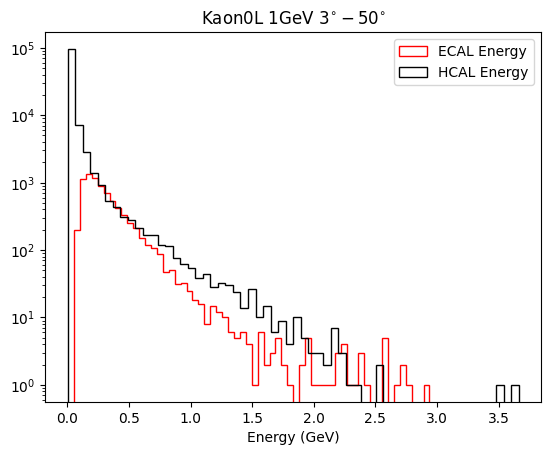

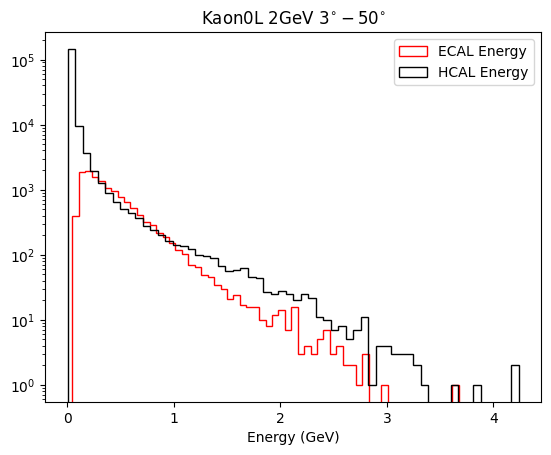

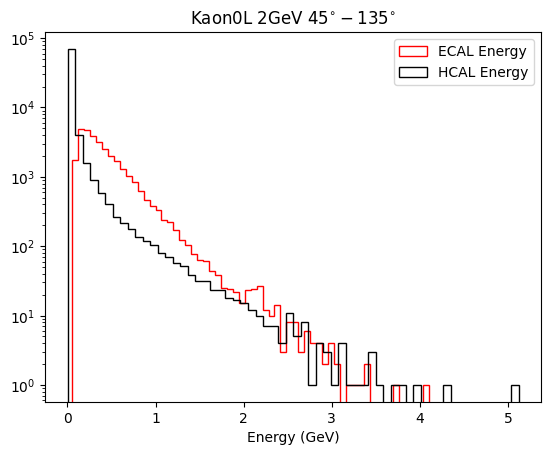

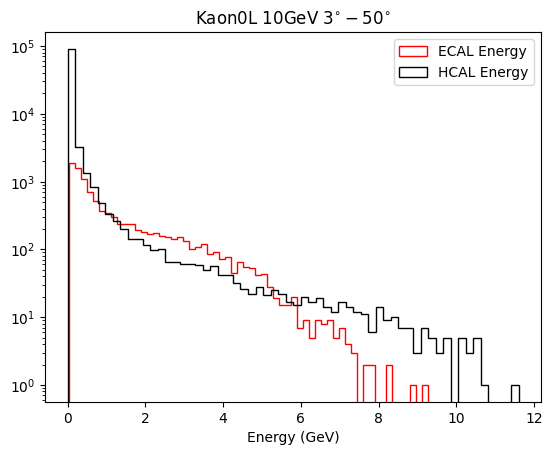

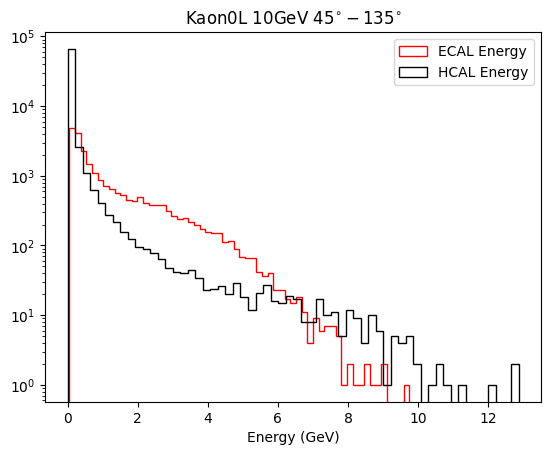

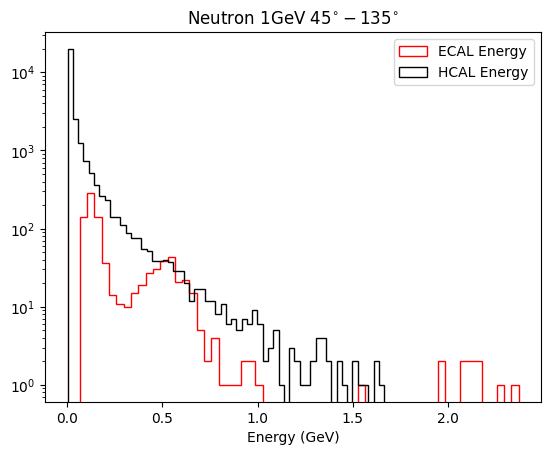

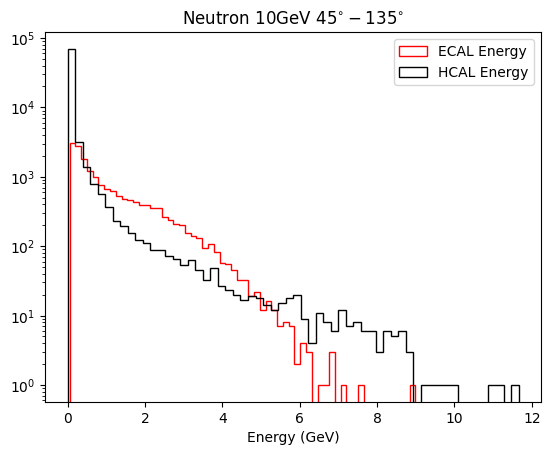

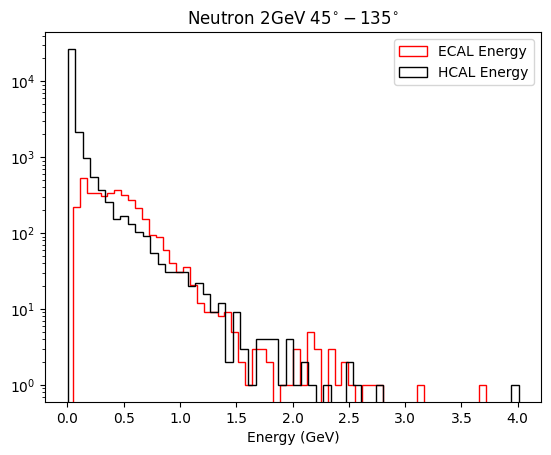

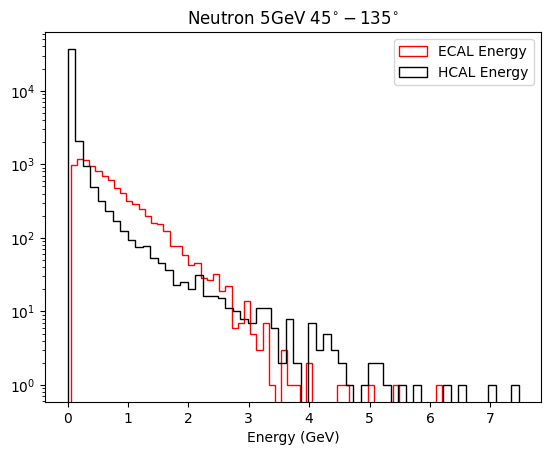

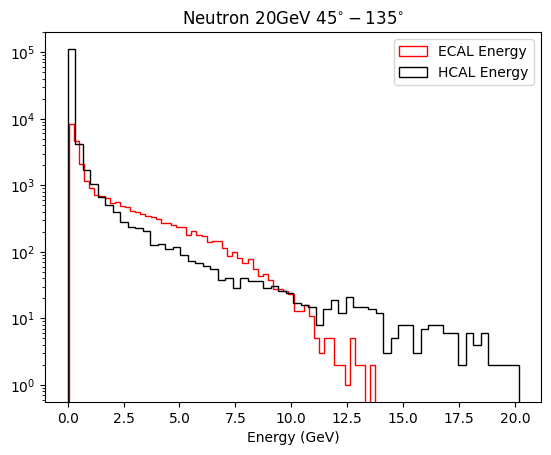

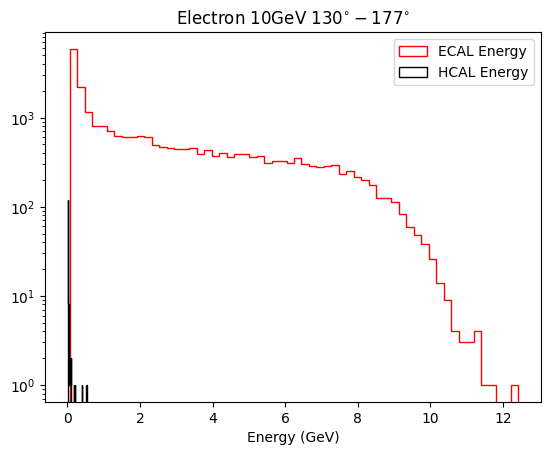

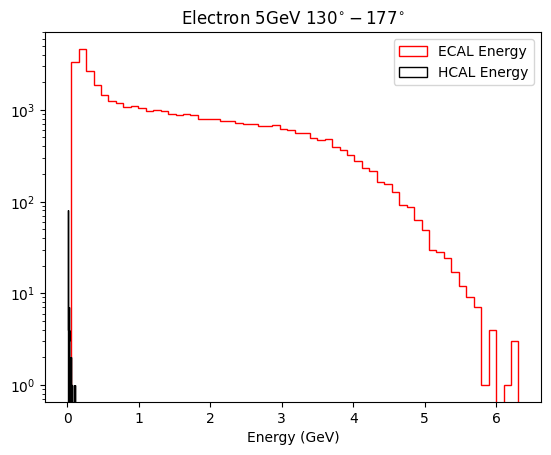

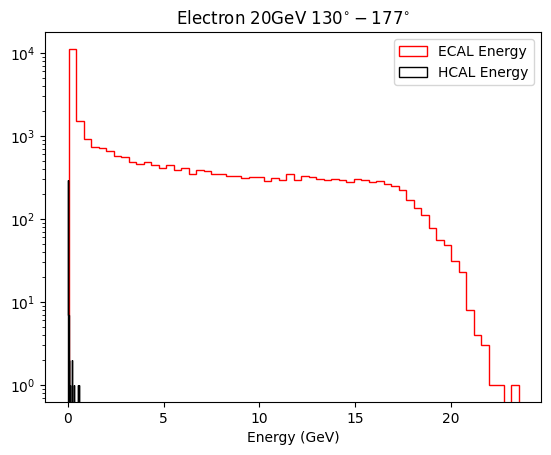

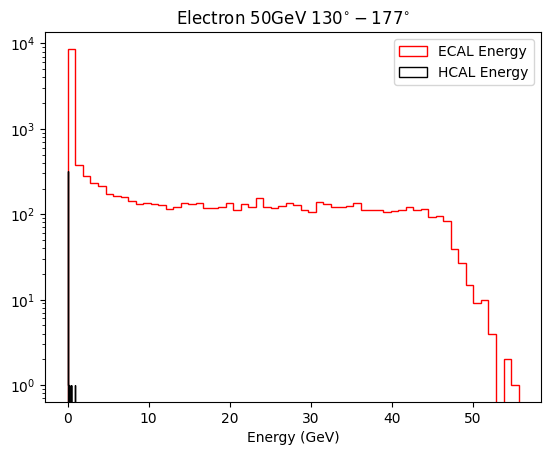

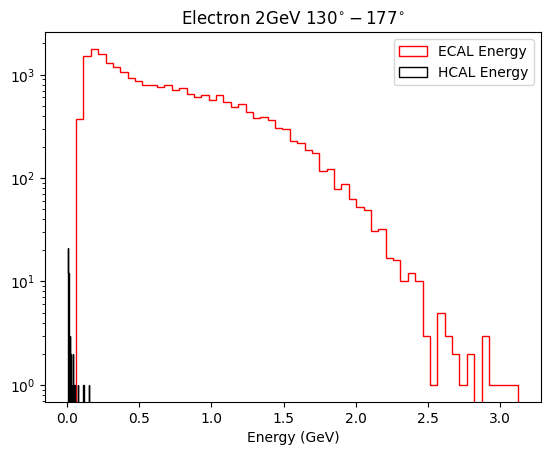

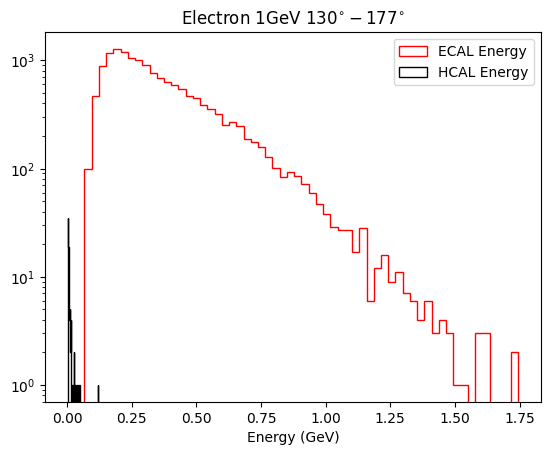

In [44]:
kaonTitles = ["Kaon0L 5GeV $45^{\circ}-135^{\circ}$", "Kaon0L 5GeV $3^{\circ}-50^{\circ}$", "Kaon0L 20GeV $45^{\circ}-135^{\circ}$", "Kaon0L 20GeV $3^{\circ}-50^{\circ}$",
             "Kaon0L 1GeV $45^{\circ}-135^{\circ}$", "Kaon0L 1GeV $3^{\circ}-50^{\circ}$", "Kaon0L 2GeV $3^{\circ}-50^{\circ}$", "Kaon0L 2GeV $45^{\circ}-135^{\circ}$",
             "Kaon0L 10GeV $3^{\circ}-50^{\circ}$", "Kaon0L 10GeV $45^{\circ}-135^{\circ}$"]

neutronTitles = ["Neutron 1GeV $45^{\circ}-135^{\circ}$", "Neutron 10GeV $45^{\circ}-135^{\circ}$", "Neutron 2GeV $45^{\circ}-135^{\circ}$", "Neutron 5GeV $45^{\circ}-135^{\circ}$", 
                "Neutron 20GeV $45^{\circ}-135^{\circ}$"]

electronTitles = ["Electron 10GeV $130^{\circ}-177^{\circ}$", "Electron 5GeV $130^{\circ}-177^{\circ}$", "Electron 20GeV $130^{\circ}-177^{\circ}$",
                  "Electron 50GeV $130^{\circ}-177^{\circ}$", "Electron 2GeV $130^{\circ}-177^{\circ}$", "Electron 1GeV $130^{\circ}-177^{\circ}$"]

finalFiles = [kaonFiles, neutronFiles, electronFiles]
allTitles = [kaonTitles, neutronTitles, electronTitles]

for i, neededfiles in enumerate(finalFiles):
    for j, infile in enumerate(neededfiles):
        plots3(infile, allTitles[i][j])